<a href="https://colab.research.google.com/github/hemang03/decision_tree/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [5]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
inputs = df.drop('Purchased' , axis='columns')

In [7]:
targets = df.Purchased

In [12]:
Gender = pd.get_dummies(inputs['Gender'])

In [23]:
inputs = pd.concat([inputs,Gender],axis='columns')
inputs.head(3)

,User ID,Gender,Age,EstimatedSalary,Female,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,1,0


In [26]:
inputs.drop(['Male' , 'Gender' ],axis='columns', inplace = True)

In [27]:
inputs.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Female'], dtype='object')

In [28]:
inputs['Age'] >=10

0      True
1      True
2      True
3      True
4      True
       ... 
395    True
396    True
397    True
398    True
399    True
Name: Age, Length: 400, dtype: bool

In [30]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(inputs , targets , test_size =0.2 , random_state =0) 

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5 , metric = 'minkowski' , n_jobs =-1)
model.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
y_pred = model.predict(X_test)


In [41]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [42]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
cm = confusion_matrix(y_pred , y_test)
ac = accuracy_score(y_test , y_pred)
cr = classification_report(y_test , y_pred)

In [43]:
cm

array([[44, 12],
       [14, 10]])

In [45]:
inputs.corr()

,User ID,Age,EstimatedSalary,Female
User ID,1.000000,-0.000721,0.071097,0.025249
Age,-0.000721,1.000000,0.155238,0.073741
EstimatedSalary,0.071097,0.155238,1.000000,0.060435
Female,0.025249,0.073741,0.060435,1.000000


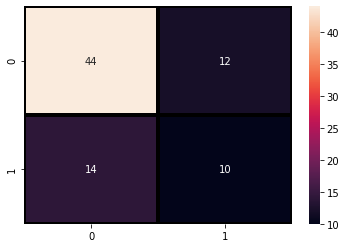

In [46]:
sns.heatmap(cm , annot = True , linecolor='black' , linewidths=3)

In [47]:
cr

'              precision    recall  f1-score   support\n\n           0       0.79      0.76      0.77        58\n           1       0.42      0.45      0.43        22\n\n    accuracy                           0.68        80\n   macro avg       0.60      0.61      0.60        80\nweighted avg       0.68      0.68      0.68        80\n'

In [49]:
print(ac*100)

67.5


In [50]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(model , X_train , y_train , cv =10)


In [52]:
accuracy.mean()

0.75625

In [53]:
accuracy.std()

0.07368641326594748

In [ ]:
# thank you for watchibg